## Problema 6
Los siguientes datos corresponden a la resistencia a la tension (100 psi) y dureza (Rockwell E) de aluminio moldeado en matriz. Dibuje un diagrama de dispersion y defina la relacion respectiva:

(0.5; 1.62), (1.5; 0.75), (2.0; 0.62), (3.0; 0.46), (2.5; 0.52), (1.0; 1.00), (0.8; 1.35), (1.2; 0.89), (2.8; 0.48), (3.2; 0.43), (1.8; 0.71), (0.3; 1.80). Dibuje un diagrama de dispersión y defina la relación correspondiente.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math
%matplotlib inline
sns.set(style='whitegrid', rc={"grid.linewidth": 0.1})
sns.set_context("paper")

plt.rc('figure', figsize=(6,3))
plt.rc('figure.subplot', wspace=.33)

In [2]:
data = pd.read_csv("data/6.csv")

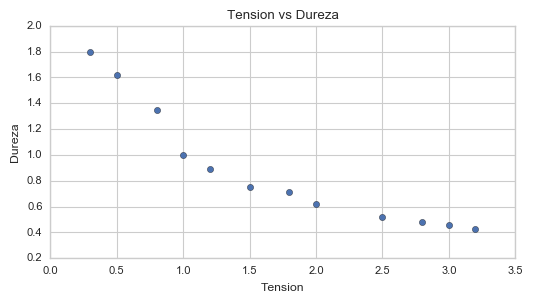

In [3]:
data.plot(kind='scatter', x='Tension', y='Dureza', title='Tension vs Dureza');

A medida que la tension aumenta, la dureza disminuye.

Variable independiente: Tension

Variable dependiente: Dureza

##  Problema 9

Los siguientes datos corresponden al octanaje de varias mezclas de gasolina:

88.5 87.7 83.4 86.7 87.5 91.5 88.6 100.3 96.5 93.3
94.7 91.1 91.0 94.2 87.8 89.9 88.3 87.6 84.3 86.7
84.3 86.7 88.2 90.8 88.3 98.8 94.2 92.7 93.2 91.0
90.1 93.4 88.5 90.1 89.2 88.3 85.3 87.9 88.6 90.9
89.0 96.1 93.3 91.8 92.3 90.4 90.1 93.0 88.7 89.9
89.8 89.6 87.4 88.4 88.9 91.2 89.3 94.4 92.7 91.8
91.6 90.4 91.1 92.6 89.8 90.6 91.1 90.4 89.3 89.7
90.3 91.6 90.5 93.7 92.7 92.2 92.2 91.2 91.0 92.2
90.0 90.7

Construya una tabla de distribución de frecuencias y un histograma utilizando 8 clases y 16 clases.
Compare los histogramas obtenidos en cada caso, ¿los dos histogramas presentan información similar?.

In [4]:
data = pd.read_csv("data/9.csv")

#### Con n_classes = 8

In [5]:
n_classes = 8

In [6]:
cats = pd.cut(data["Octanaje"], n_classes)
counts = pd.value_counts(cats).sort_index()
counts

(83.383, 85.513]     4
(85.513, 87.625]     6
(87.625, 89.737]    20
(89.737, 91.85]     30
(91.85, 93.963]     14
(93.963, 96.075]     4
(96.075, 98.188]     2
(98.188, 100.3]      2
Name: Octanaje, dtype: int64

In [7]:
midpoint = [(float(s) + float(e)) / 2 for [s, e] in [v[1:-1].split(",") for v in counts.index]]
midpoint_col = pd.Series(midpoint, name="Midpoint")

**Frequency table**

In [8]:
freq_table = pd.DataFrame(counts.values, columns=["Frequency"])
sample_size = freq_table["Frequency"].sum()
freq_table["Relative frequency"] = freq_table["Frequency"] / sample_size
freq_table["Cumulative frequency"] = freq_table["Frequency"].cumsum()
freq_table["Cumumative relative frequency"] = freq_table["Cumulative frequency"] / sample_size

In [9]:
pd.concat([pd.Series(counts.index, name="Interval"),
           midpoint_col,
           freq_table], axis=1)

,Interval,Midpoint,Frequency,Relative frequency,Cumulative frequency,Cumumative relative frequency
0,"(83.383, 85.513]",84.4480,4,0.048780,4,0.048780
1,"(85.513, 87.625]",86.5690,6,0.073171,10,0.121951
2,"(87.625, 89.737]",88.6810,20,0.243902,30,0.365854
3,"(89.737, 91.85]",90.7935,30,0.365854,60,0.731707
4,"(91.85, 93.963]",92.9065,14,0.170732,74,0.902439
5,"(93.963, 96.075]",95.0190,4,0.048780,78,0.951220
6,"(96.075, 98.188]",97.1315,2,0.024390,80,0.975610
7,"(98.188, 100.3]",99.2440,2,0.024390,82,1.000000


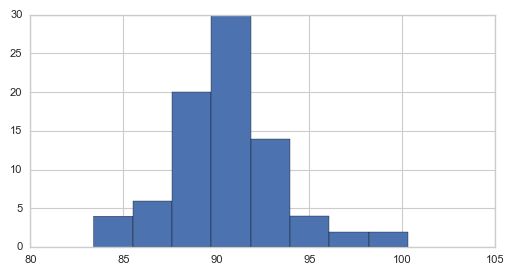

In [10]:
data["Octanaje"].hist(bins=n_classes)

#### Con n_classes = 16

In [11]:
def compute_freq_table(data, column, n_classes):
    cats = pd.cut(data[column], n_classes)
    counts = pd.value_counts(cats).sort_index()
    midpoint = [(float(s) + float(e)) / 2 for [s, e] in [v[1:-1].split(",") for v in counts.index]]
    midpoint_col = pd.Series(midpoint, name="Midpoint")
    freq_table = pd.DataFrame(counts.values, columns=["Frequency"])
    sample_size = freq_table["Frequency"].sum()
    freq_table["Relative frequency"] = freq_table["Frequency"] / sample_size
    freq_table["Cumulative frequency"] = freq_table["Frequency"].cumsum()
    freq_table["Cumumative relative frequency"] = freq_table["Cumulative frequency"] / sample_size

    return pd.concat([pd.Series(counts.index, name="Interval"),
                      midpoint_col,
                      freq_table], axis=1)

n_classes = 16
compute_freq_table(data, "Octanaje", n_classes)

,Interval,Midpoint,Frequency,Relative frequency,Cumulative frequency,Cumumative relative frequency
0,"(83.383, 84.456]",83.91950,3,0.036585,3,0.036585
1,"(84.456, 85.513]",84.98450,1,0.012195,4,0.048780
2,"(85.513, 86.569]",86.04100,0,0.000000,4,0.048780
3,"(86.569, 87.625]",87.09700,6,0.073171,10,0.121951
4,"(87.625, 88.681]",88.15300,12,0.146341,22,0.268293
5,"(88.681, 89.737]",89.20900,8,0.097561,30,0.365854
6,"(89.737, 90.794]",90.26550,15,0.182927,45,0.548780
7,"(90.794, 91.85]",91.32200,15,0.182927,60,0.731707
8,"(91.85, 92.906]",92.37800,8,0.097561,68,0.829268
9,"(92.906, 93.963]",93.43450,6,0.073171,74,0.902439


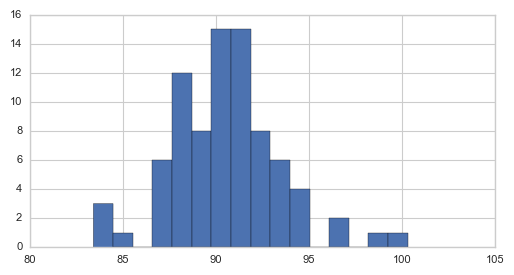

In [12]:
data["Octanaje"].hist(bins=n_classes)

Viendo ambas distribuciones, los dos histogramas presentan la misma informacion. Por ejemplo, el 50% de los datos presenta valores menores aproximadamente menores a 89. El segundo histograma presenta los datos mas dispersos que el primero.

##  Problema 10

Los siguientes datos son mediciones de viscosidad de un producto químico tomadas cada hora (de arriba
abajo y de izquierda a derecha):

47.9 48.8 48.6 43.2 43.0
47.9 48.1 48.0 43.0 42.8
48.6 48.3 47.9 43.5 43.1
48.0 47.2 48.3 43.1 43.2
48.4 48.9 48.5 43.0 43.6
48.1 48.6 48.1 42.9 43.2
48.0 48.0 48.0 43.6 43.5
48.6 47.5 48.3 43.3 43.0

Construya una gráfica de series de tiempo para estos datos.

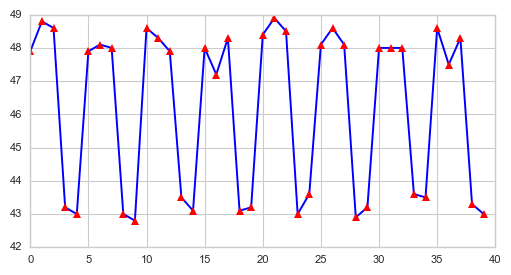

In [13]:
ts = pd.read_csv("data/10.csv")

fig, ax1 = plt.subplots()
ax1.plot(ts.index, ts, 'b-')       
ax1.plot(ts.index, ts,'r^')